In [137]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

import datetime as dt

%matplotlib inline

In [138]:
end_date = '2024-10-21T00:00:00.000-05:00'

In [139]:
#Read in raw stream guage data
#pompton_plains = pd.read_csv('data/archive/pompton_plains.txt', sep='\t', skiprows=27)
pompton_plains = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=01388500&parameterCd=00065&startDT=2022-01-01T11:24:30.377-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
pompton_plains = pompton_plains.iloc[1: , :]
pompton_plains['194446_00065'] = pompton_plains['194446_00065'].astype(float)
pompton_plains = pompton_plains[['datetime','194446_00065']]
pompton_plains = pompton_plains.set_index('datetime')
pompton_plains['item_id'] = 'pompton_gage'
pompton_plains.rename(columns={'194446_00065': 'series'}, inplace=True)
pompton_plains.head()

,series,item_id
datetime,,
2022-01-01 12:30,8.3,pompton_gage
2022-01-01 12:45,8.3,pompton_gage
2022-01-01 13:00,8.3,pompton_gage
2022-01-01 13:15,8.3,pompton_gage
2022-01-01 13:30,8.3,pompton_gage


In [140]:
#pequannock_riverdale = pd.read_csv('data/archive/pequannock_riverdale.txt', sep='\t', skiprows=26)
pequannock_riverdale = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01382800&parameterCd=00065&startDT=2022-01-01T11:35:34.719-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
pequannock_riverdale = pequannock_riverdale.iloc[1: , :]
pequannock_riverdale['194387_00065'] = pequannock_riverdale['194387_00065'].astype(float)
pequannock_riverdale = pequannock_riverdale[['datetime','194387_00065']]
pequannock_riverdale = pequannock_riverdale.set_index('datetime')
pequannock_riverdale['item_id'] = 'riverdale_gage'
pequannock_riverdale.rename(columns={'194387_00065': 'series'}, inplace=True)
pequannock_riverdale.head()

,series,item_id
datetime,,
2022-01-01 12:45,2.45,riverdale_gage
2022-01-01 13:00,2.45,riverdale_gage
2022-01-01 13:15,2.45,riverdale_gage
2022-01-01 13:30,2.45,riverdale_gage
2022-01-01 13:45,2.45,riverdale_gage


In [141]:
#ramapo_pompton = pd.read_csv('data/archive/ramapo_pompton.txt', sep='\t', skiprows=26)
ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT=2022-01-01T11:37:24.242-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)
ramapo_pompton = ramapo_pompton.iloc[1: , :]
ramapo_pompton

/var/folders/39/8gc7tmt964lf1zccbqy781gm0000gp/T/ipykernel_7299/4189062329.py:2: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  ramapo_pompton = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=01388000&parameterCd=00065&startDT=2022-01-01T11:37:24.242-05:00&endDT='+end_date+'&siteStatus=all&format=rdb', sep='\t', skiprows=27)


,agency_cd,site_no,datetime,tz_cd,194435_00065,194435_00065_cd
1,USGS,01388000,2022-01-01 12:40,EST,7.39,A
2,USGS,01388000,2022-01-01 12:45,EST,7.38,A
3,USGS,01388000,2022-01-01 12:50,EST,7.38,A
4,USGS,01388000,2022-01-01 12:55,EST,7.39,A
5,USGS,01388000,2022-01-01 13:00,EST,7.39,A
...,...,...,...,...,...,...
294150,USGS,1388000,2024-10-21 00:40,EDT,6.57,P
294151,USGS,1388000,2024-10-21 00:45,EDT,6.57,P
294152,USGS,1388000,2024-10-21 00:50,EDT,6.57,P
294153,USGS,1388000,2024-10-21 00:55,EDT,6.57,P


In [142]:
ramapo_pompton['194435_00065'] = ramapo_pompton['194435_00065'].astype(float)
ramapo_pompton = ramapo_pompton[['datetime','194435_00065']]
ramapo_pompton = ramapo_pompton.set_index('datetime')
ramapo_pompton['item_id'] = 'ramapo_gage'
ramapo_pompton.rename(columns={'194435_00065': 'series'}, inplace=True)
ramapo_pompton.head()

,series,item_id
datetime,,
2022-01-01 12:40,7.39,ramapo_gage
2022-01-01 12:45,7.38,ramapo_gage
2022-01-01 12:50,7.38,ramapo_gage
2022-01-01 12:55,7.39,ramapo_gage
2022-01-01 13:00,7.39,ramapo_gage


In [143]:
#ppp = pd.read_csv('data/archive/pompton_plains_precip.txt',sep='\t', skiprows=26)
ppp = pd.read_csv('https://nwis.waterservices.usgs.gov/nwis/iv/?sites=405811074165501&parameterCd=00045&startDT=2022-01-01T11:39:50.674-05:00&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
ppp = ppp.iloc[1: , :]
ppp['99543_00045'] = ppp['99543_00045'].astype(float)
ppp = ppp.rename(columns={"99543_00045": "pompton_precip"})
ppp = ppp[['datetime','pompton_precip']]
ppp = ppp.set_index('datetime')
ppp['item_id'] = 'pompton_precip'
ppp.rename(columns={'pompton_precip': 'series'}, inplace=True)
ppp.head()

,series,item_id
datetime,,
2024-06-23 00:00,0.0,pompton_precip
2024-06-23 00:15,0.0,pompton_precip
2024-06-23 00:30,0.0,pompton_precip
2024-06-23 00:45,0.0,pompton_precip
2024-06-23 01:00,0.0,pompton_precip


In [144]:
#rpp = pd.read_csv('data/archive/ramapo_pompton_precip.txt',sep='\t', skiprows=26)
rpp = pd.read_csv('https://waterservices.usgs.gov/nwis/iv/?sites=410239074173501&parameterCd=00045&startDT=2022-01-01T11:40:45.545-05:00&endDT='+end_date+'&siteStatus=all&format=rdb',sep='\t', skiprows=26)
rpp = rpp.iloc[1: , :]
rpp['99565_00045'] = rpp['99565_00045'].astype(float)
rpp = rpp.rename(columns={"99565_00045": "ramapo_precip"})
rpp = rpp[['datetime','ramapo_precip']]
rpp = rpp.set_index('datetime')
rpp['item_id'] = 'ramapo_precip'
rpp.rename(columns={'ramapo_precip': 'series'}, inplace=True)
rpp.head()

,series,item_id
datetime,,
2024-06-23 00:00,0.0,ramapo_precip
2024-06-23 00:15,0.0,ramapo_precip
2024-06-23 00:30,0.0,ramapo_precip
2024-06-23 00:45,0.0,ramapo_precip
2024-06-23 01:00,0.0,ramapo_precip


In [145]:
import scipy.stats as stats
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [146]:
merge = pd.concat([pompton_plains, pequannock_riverdale, ramapo_pompton, ppp, rpp])

merge

In [147]:
merge

,series,item_id
datetime,,
2022-01-01 12:30,8.3,pompton_gage
2022-01-01 12:45,8.3,pompton_gage
2022-01-01 13:00,8.3,pompton_gage
2022-01-01 13:15,8.3,pompton_gage
2022-01-01 13:30,8.3,pompton_gage
...,...,...
2024-10-21 00:00,0.0,ramapo_precip
2024-10-21 00:15,0.0,ramapo_precip
2024-10-21 00:30,0.0,ramapo_precip


In [148]:
#merge = merge.convert_frequency(freq='H', agg_numeric="max")

In [149]:
merge.reset_index(inplace=True)

merge

,datetime,series,item_id
0,2022-01-01 12:30,8.3,pompton_gage
1,2022-01-01 12:45,8.3,pompton_gage
2,2022-01-01 13:00,8.3,pompton_gage
3,2022-01-01 13:15,8.3,pompton_gage
4,2022-01-01 13:30,8.3,pompton_gage
...,...,...,...
513633,2024-10-21 00:00,0.0,ramapo_precip
513634,2024-10-21 00:15,0.0,ramapo_precip
513635,2024-10-21 00:30,0.0,ramapo_precip
513636,2024-10-21 00:45,0.0,ramapo_precip


In [150]:
#train_data = merge.convert_frequency(freq='H', agg_numeric="max")

In [151]:
train_data = TimeSeriesDataFrame.from_data_frame(merge, id_column="item_id", timestamp_column='datetime') #, timestamp_column=merge.index
train_data.head()


series
item_id      timestamp                  
pompton_gage 2022-01-01 12:30:00     8.3
             2022-01-01 12:45:00     8.3
             2022-01-01 13:00:00     8.3
             2022-01-01 13:15:00     8.3
             2022-01-01 13:30:00     8.3

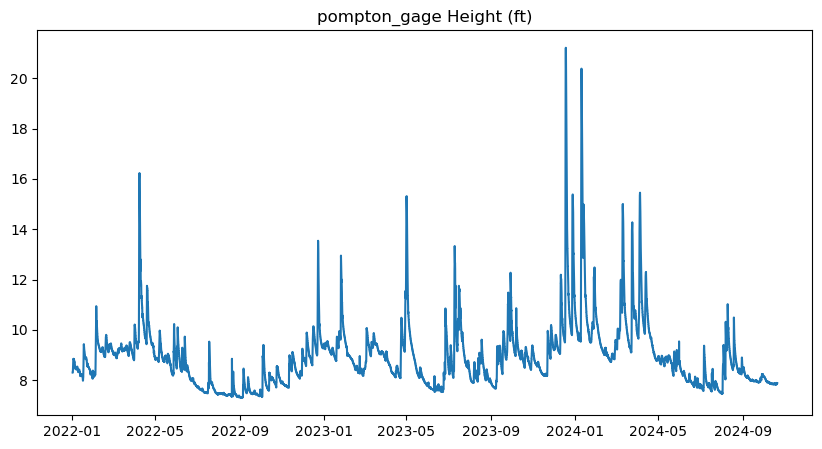

In [152]:
item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title(item_id+' Height (ft)')

y_past = train_data.loc[item_id]["series"]

plt.plot(y_past, label="Past time series values")

In [153]:
#test_data.head()

In [154]:
train_data = train_data.convert_frequency(freq='H', agg_numeric="max")

/Users/tott/opt/anaconda3/envs/py310/lib/python3.10/site-packages/autogluon/timeseries/dataset/ts_dataframe.py:942: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset = pd.tseries.frequencies.to_offset(freq)


In [155]:
train_data.head()

series
item_id      timestamp                  
pompton_gage 2022-01-01 12:00:00     8.3
             2022-01-01 13:00:00     8.3
             2022-01-01 14:00:00     8.3
             2022-01-01 15:00:00     8.3
             2022-01-01 16:00:00     8.3

In [156]:
prediction_length = 24
train_data, test_data = train_data.train_test_split(prediction_length)

In [157]:
train_data

series
item_id       timestamp                  
pompton_gage  2022-01-01 12:00:00     8.3
              2022-01-01 13:00:00     8.3
              2022-01-01 14:00:00     8.3
              2022-01-01 15:00:00     8.3
              2022-01-01 16:00:00     8.3
...                                   ...
ramapo_precip 2024-10-19 21:00:00     0.0
              2024-10-19 22:00:00     0.0
              2024-10-19 23:00:00     0.0
              2024-10-20 00:00:00     0.0
              2024-10-20 01:00:00     0.0

[79342 rows x 1 columns]

In [158]:
test_data

series
item_id       timestamp                  
pompton_gage  2022-01-01 12:00:00     8.3
              2022-01-01 13:00:00     8.3
              2022-01-01 14:00:00     8.3
              2022-01-01 15:00:00     8.3
              2022-01-01 16:00:00     8.3
...                                   ...
ramapo_precip 2024-10-20 21:00:00     0.0
              2024-10-20 22:00:00     0.0
              2024-10-20 23:00:00     0.0
              2024-10-21 00:00:00     0.0
              2024-10-21 01:00:00     0.0

[79462 rows x 1 columns]

In [159]:
predictor = TimeSeriesPredictor(
    prediction_length=prediction_length,
    path="pompton_gage_autogluon_"+str(prediction_length),
    target="series",
    eval_metric="RMSE",
)

predictor.fit(
    train_data,
    presets="fast_training",
    num_val_windows = 8,#
    time_limit=600,
)

Beginning AutoGluon training... Time limit = 600s
AutoGluon will save models to 'pompton_gage_autogluon_24'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.11
Operating System:   Darwin
Platform Machine:   x86_64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:30 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6000
CPU Count:          10
GPU Count:          0
Memory Avail:       1.04 GB / 16.00 GB (6.5%)
Disk Space Avail:   18.28 GB / 926.35 GB (2.0%)
Setting presets to: fast_training

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': 'very_light',
 'known_covariates_names': [],
 'num_val_windows': 8,
 'prediction_length': 24,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'series',
 'time_limit': 600,
 'verbosity': 2}

Inferred time series frequency: 'h'
train_data cont

In [160]:
predictions = predictor.predict(test_data)
predictions

data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean       0.1       0.2       0.3  \
item_id       timestamp                                                     
pompton_gage  2024-10-21 02:00:00  7.879997  7.830359  7.845936  7.857313   
              2024-10-21 03:00:00  7.879995  7.806840  7.830519  7.847878   
              2024-10-21 04:00:00  7.879992  7.785090  7.815520  7.835353   
              2024-10-21 05:00:00  7.879989  7.778086  7.803569  7.830840   
              2024-10-21 06:00:00  7.879987  7.765341  7.798026  7.826789   
...                                     ...       ...       ...       ...   
ramapo_precip 2024-10-21 21:00:00  0.000196 -0.809853 -0.543108 -0.344342   
              2024-10-21 22:00:00  0.000197 -0.850338 -0.572172 -0.349785   
              2024-10-21 23:00:00  0.000198 -0.828929 -0.526212 -0.342914   
              2024-10-22 00:00:00  0.000199 -0.866877 -0.554543 -0.342293   
              2024-10-22 01:00:00  0.000200 -0.870647 -0.572490 -0.360239   

                                        0.4       0.5       0.6       0.7  \
item_id       timestamp                                                     
pompton_gage  2024-10-21 02:00:00  7.870377  7.881370  7.892900  7.903825   
              2024-10-21 03:00:00  7.863418  7.877701  7.890800  7.907499   
              2024-10-21 04:00:00  7.857634  7.875032  7.895595  7.914419   
              2024-10-21 05:00:00  7.848912  7.866091  7.889846  7.915618   
              2024-10-21 06:00:00  7.849427  7.871106  7.895051  7.922392   
...                                     ...       ...       ...       ...   
ramapo_precip 2024-10-21 21:00:00 -0.168178 -0.007213  0.149056  0.311278   
              2024-10-21 22:00:00 -0.169959  0.002078  0.151832  0.341108   
              2024-10-21 23:00:00 -0.165394 -0.013244  0.165523  0.341329   
              2024-10-22 00:00:00 -0.175703 -0.003689  0.158288  0.345303   
              2024-10-22 01:00:00 -0.176906 -0.009129  0.162070  0.350323   

                                        0.8       0.9  
item_id       timestamp                                
pompton_gage  2024-10-21 02:00:00  7.916201  7.936284  
              2024-10-21 03:00:00  7.927050  7.953906  
              2024-10-21 04:00:00  7.937474  7.968270  
              2024-10-21 05:00:00  7.938843  7.970384  
              2024-10-21 06:00:00  7.947288  7.991976  
...                                     ...       ...  
ramapo_precip 2024-10-21 21:00:00  0.515257  0.769602  
              2024-10-21 22:00:00  0.542310  0.804261  
              2024-10-21 23:00:00  0.537132  0.840935  
              2024-10-22 00:00:00  0.531737  0.829058  
              2024-10-22 01:00:00  0.570442  0.861360  

[120 rows x 10 columns]

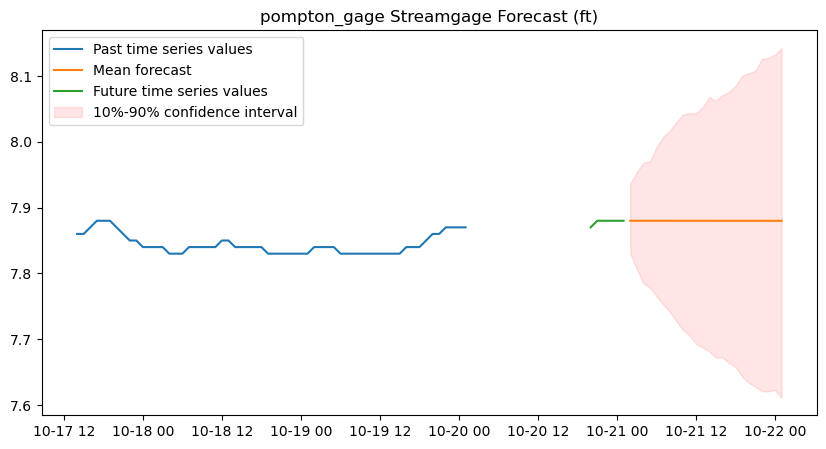

In [161]:
# TimeSeriesDataFrame can also be loaded directly from a file

#test_data = predictions

item_id = 'pompton_gage'

plt.figure(figsize=(10, 5))
plt.title(item_id+' Streamgage Forecast (ft)')

y_past = train_data.loc[item_id]["series"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["series"]

plt.plot(y_past[-60:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test[-6:], label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend(loc = 'upper left');
plt.savefig(item_id+'_'+str(prediction_length)+'_forecast.png')

In [162]:
y_pred[['mean', '0.1', '0.9']]

,mean,0.1,0.9
timestamp,,,
2024-10-21 02:00:00,7.879997,7.830359,7.936284
2024-10-21 03:00:00,7.879995,7.806840,7.953906
2024-10-21 04:00:00,7.879992,7.785090,7.968270
2024-10-21 05:00:00,7.879989,7.778086,7.970384
2024-10-21 06:00:00,7.879987,7.765341,7.991976
2024-10-21 07:00:00,7.879984,7.752987,8.007370
2024-10-21 08:00:00,7.879982,7.741714,8.016690
2024-10-21 09:00:00,7.879979,7.727606,8.029738
2024-10-21 10:00:00,7.879977,7.714122,8.041481


In [163]:
predictions.info()

<class 'autogluon.timeseries.dataset.ts_dataframe.TimeSeriesDataFrame'>
MultiIndex: 120 entries, ('pompton_gage', Timestamp('2024-10-21 02:00:00')) to ('ramapo_precip', Timestamp('2024-10-22 01:00:00'))
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    120 non-null    float64
 1   0.1     120 non-null    float64
 2   0.2     120 non-null    float64
 3   0.3     120 non-null    float64
 4   0.4     120 non-null    float64
 5   0.5     120 non-null    float64
 6   0.6     120 non-null    float64
 7   0.7     120 non-null    float64
 8   0.8     120 non-null    float64
 9   0.9     120 non-null    float64
dtypes: float64(10)
memory usage: 10.7+ KB
